This work is licensed under the Creative Commons Attribution-NonCommercial 3.0 Unported License. To view a copy of this license, visit http://creativecommons.org/licenses/by-nc/3.0/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.

# Lists

This chapter presents one of Python’s most useful built-in types, lists. You will also learn
more about objects and what can happen when you have more than one name for the same
object.


### 10.1 A list is a sequence

Like a string, a list is a sequence of values. In a string, the values are characters; in a list,
they can be any type. The values in a list are called **elements** or sometimes **items**.

There are several ways to create a new list; the simplest is to enclose the elements in square
brackets ([ and ]):

[10, 20, 30, 40]<br>
['crunchy frog', 'ram bladder', 'lark vomit']

The first example is a list of four integers. The second is a list of three strings. The elements
of a list don’t have to be the same type. The following list contains a string, a float, an
integer, and (lo!) another list:

['spam', 2.0, 5, [10, 20]]

A list within another list is **nested**.

A list that contains no elements is called an empty list; you can create one with empty
brackets, [].

As you might expect, you can assign list values to variables:

In [ ]:
cheeses = ['Cheddar', 'Edam', 'Gouda']
numbers = [42, 123]
empty = []
print(cheeses, numbers, empty)

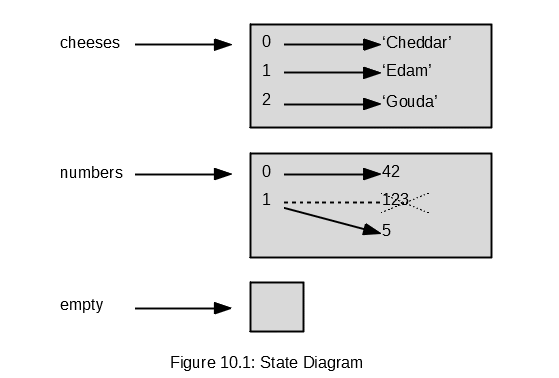


### 10.2 Lists are mutable

The syntax for accessing the elements of a list is the same as for accessing the characters
of a string—the bracket operator. The expression inside the brackets specifies the index.
Remember that the indices start at 0:

In [ ]:
cheeses[0]

Unlike strings, lists are mutable. When the bracket operator appears on the left side of an
assignment, it identifies the element of the list that will be assigned.

In [ ]:
numbers = [42, 123]
numbers[1] = 5
numbers

The one-eth element of numbers, which used to be 123, is now 5.

Figure 10.1 shows the state diagram for cheeses, numbers and empty:

Lists are represented by boxes with the word “list” outside and the elements of the list
inside. cheeses refers to a list with three elements indexed 0, 1 and 2. numbers contains
two elements; the diagram shows that the value of the second element has been reassigned
from 123 to 5. empty refers to a list with no elements.

List indices work the same way as string indices:

- Any integer expression can be used as an index.

- If you try to read or write an element that does not exist, you get an IndexError.

- If an index has a negative value, it counts backward from the end of the list.
The in operator also works on lists.

In [ ]:
'Edam' in cheeses

In [ ]:
'Brie' in cheeses

### 10.3 Traversing a list

The most common way to traverse the elements of a list is with a for loop. The syntax is
the same as for strings:

In [ ]:
for cheese in cheeses:
    print(cheese)

This works well if you only need to read the elements of the list. But if you want to write
or update the elements, you need the indices. A common way to do that is to combine the
built-in functions range and len:

In [ ]:
print(numbers)
for i in range(len(numbers)):
    numbers[i] = numbers[i] * 2

print(numbers)

This loop traverses the list and updates each element. len returns the number of elements
in the list. range returns a list of indices from 0 to n - 1, where n is the length of the list.
Each time through the loop i gets the index of the next element. The assignment statement
in the body uses i to read the old value of the element and to assign the new value.

A for loop over an empty list never runs the body:

In [ ]:
for x in []:
    print('This never happens.')

Although a list can contain another list, the nested list still counts as a single element. The
length of this list is four:

In [ ]:
this_list = ['spam', 1, ['Brie', 'Roquefort', 'Pol le Veq'], [1, 2, 3]]
len(this_list)

### 10.4 List operations

The + operator concatenates lists:

In [ ]:
a = [1, 2, 3]
b = [4, 5, 6]
c = a + b
c

The * operator repeats a list a given number of times:

In [ ]:
[0] * 4

In [ ]:
[1, 2, 3] * 3

The first example repeats [0] four times. The second example repeats the list [1, 2, 3]
three times.


### 10.5 List slices

The slice operator also works on lists:

In [ ]:
 t = ['a', 'b', 'c', 'd', 'e', 'f']
print(t[1:3])
print(t[:4])
print(t[3:])
print(t[::2]) # third index is increment

If you omit the first index, the slice starts at the beginning. If you omit the second, the slice
goes to the end. So if you omit both, the slice is a copy of the whole list.

In [ ]:
t[:]

Since lists are mutable, it is often useful to make a copy before performing operations that
modify lists.

A slice operator on the left side of an assignment can update multiple elements:

In [ ]:
t = ['a', 'b', 'c', 'd', 'e', 'f']
t[1:3] = ['x', 'y']
t

### 10.6 List methods

Python provides methods that operate on lists. For example, append adds a new element
to the end of a list:

In [ ]:
t = ['a', 'b', 'c']
t.append('d')
t

extend takes a list as an argument and appends all of the elements:

In [ ]:
t1 = ['a', 'b', 'c']
t2 = ['d', 'e']
t1.extend(t2)
t1

This example leaves t2 unmodified.

sort arranges the elements of the list from low to high:

In [ ]:
t = ['d', 'c', 'e', 'b', 'a']
t.sort()
t

Most list methods are void; they modify the list and return None. If you accidentally write
t = t.sort(), you will be disappointed with the result.


### 10.7 Map, filter and reduce

To add up all the numbers in a list, you can use a loop like this:

In [ ]:
def add_all(t):
    total = 0
    for x in t:
        total += x
    return total

numbers = [1,2,3,4]
add_all(numbers)

total is initialized to 0. Each time through the loop, x gets one element from the list.
The += operator provides a short way to update a variable. This **augmented assignment
statement**,
```python 
total += x```
is equivalent to
```python
total = total + x```
As the loop runs, total accumulates the sum of the elements; a variable used this way is
sometimes called an **accumulator**.

Adding up the elements of a list is such a common operation that Python provides it as a
built-in function, sum:

In [ ]:
t = [1, 2, 3]
sum(t)

An operation like this that combines a sequence of elements into a single value is sometimes
called **reduce**.

Sometimes you want to traverse one list while building another. For example, the following
function takes a list of strings and returns a new list that contains capitalized strings:

In [ ]:
def capitalize_all(t):
    res = []
    for s in t:
        res.append(s.capitalize())
    return res

herbs = ['parsley', 'sage', 'rosemary', 'thyme']
capitalize_all(herbs)

res is initialized with an empty list; each time through the loop, we append the next element.
So res is another kind of accumulator.

An operation like capitalize_all is sometimes called a **map** because it “maps” a function
(in this case the method capitalize) onto each of the elements in a sequence.

Another common operation is to select some of the elements from a list and return a sublist.
For example, the following function takes a list of strings and returns a list that contains
only the uppercase strings:

In [ ]:
def only_upper(t):
    res = []
    for s in t:
        if s.isupper():
            res.append(s)
    return res

decode = ['How', 'WHY', 'be', 'AM', 'You', 'and', 'I', 'say', "SHOUTING"]
only_upper(decode)

isupper is a string method that returns True if the string contains only upper case letters.
An operation like only_upper is called a **filter** because it selects some of the elements and
filters out the others.

Most common list operations can be expressed as a combination of map, filter and reduce.


### 10.8 Deleting elements

There are several ways to delete elements from a list. If you know the index of the element
you want, you can use pop:

In [ ]:
t = ['a', 'b', 'c']
x = t.pop(1)
t

In [ ]:
x

pop modifies the list and returns the element that was removed. If you don’t provide an
index, it deletes and returns the last element.

If you don’t need the removed value, you can use the del operator:

In [ ]:
t = ['a', 'b', 'c']
del t[1]
t

If you know the element you want to remove (but not the index), you can use remove:

In [ ]:
t = ['a', 'b', 'c']
t.remove('b')
t

The return value from remove is None.

To remove more than one element, you can use del with a slice index:

In [ ]:
t = ['a', 'b', 'c', 'd', 'e', 'f']
del t[1:5]
t

As usual, the slice selects all the elements up to but not including the second index.


### 10.9 Lists and strings

A string is a sequence of characters and a list is a sequence of values, but a list of characters
is not the same as a string. To convert from a string to a list of characters, you can use list:

In [ ]:
s = 'spam'
t = list(s)
t

Because list is the name of a built-in function, you should avoid using it as a variable
name. I also avoid l because it looks too much like 1. So that’s why I use t.

The list function breaks a string into individual letters. If you want to break a string into
words, you can use the split method:

In [ ]:
s = 'pining for the fjords'
t = s.split()
t

An optional argument called a **delimiter** specifies which characters to use as word boundaries.
The following example uses a hyphen as a delimiter:

In [ ]:
s = 'spam-spam-spam'
delimiter = '-'
t = s.split(delimiter)
t

join is the inverse of split. It takes a list of strings and concatenates the elements. join is
a string method, so you have to invoke it on the delimiter and pass the list as a parameter:

In [ ]:
t = ['pining', 'for', 'the', 'fjords']
delimiter = ' '
s = delimiter.join(t)
s

In this case the delimiter is a space character, so join puts a space between words. To
concatenate strings without spaces, you can use the empty string, '', as a delimiter.


### 10.10 Objects and values
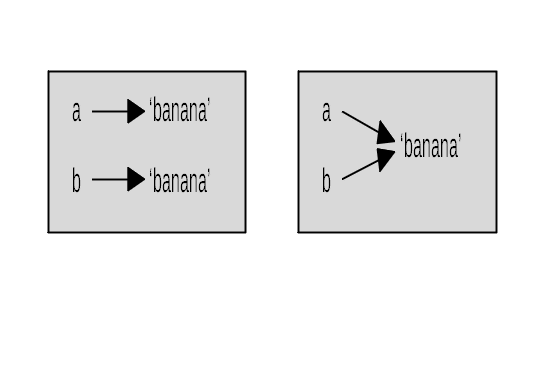
Figure 10.2: State diagram.

If we run these assignment statements:
```python
a = 'banana'
b = 'banana'```
We know that a and b both refer to a string, but we don’t know whether they refer to the
same string. There are two possible states, shown in Figure 10.2.

In one case, a and b refer to two different objects that have the same value. In the second
case, they refer to the same object.

To check whether two variables refer to the same object, you can use the is operator.

In [ ]:
a = 'banana'
b = 'banana'
a is b

In this example, Python only created one string object, and both a and b refer to it. But
when you create two lists, you get two objects:

In [ ]:
a = [1, 2, 3]
b = [1, 2, 3]
a is b

So the state diagram looks like Figure 10.3.
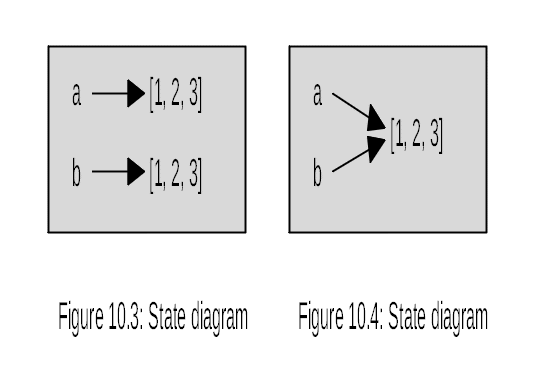
In this case we would say that the two lists are **equivalent**, because they have the same elements,
but not **identical**, because they are not the same object. If two objects are identical,
they are also equivalent, but if they are equivalent, they are not necessarily identical.

Until now, we have been using “object” and “value” interchangeably, but it is more precise
to say that an object has a value. If you evaluate [1, 2, 3], you get a list object whose
value is a sequence of integers. If another list has the same elements, we say it has the
same value, but it is not the same object.


### 10.11 Aliasing

If a refers to an object and you assign b = a, then both variables refer to the same object:

In [ ]:
a = [1, 2, 3]
b = a
b is a

The state diagram looks like Figure 10.4.

The association of a variable with an object is called a **reference**. In this example, there are
two references to the same object.

An object with more than one reference has more than one name, so we say that the object
is **aliased**.

If the aliased object is mutable, changes made with one alias affect the other:

In [ ]:
b[0] = 42
a

Although this behavior can be useful, it is error-prone. In general, it is safer to avoid
aliasing when you are working with mutable objects.

For immutable objects like strings, aliasing is not as much of a problem. In this example:
```Python
a = 'banana'
b = 'banana'
```
It almost never makes a difference whether a and b refer to the same string or not.


### 10.12 List arguments
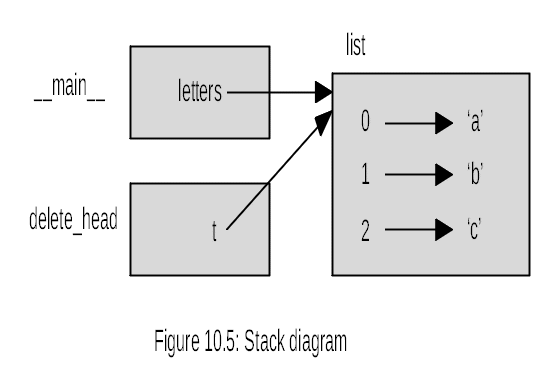
When you pass a list to a function, the function gets a reference to the list. If the function
modifies the list, the caller sees the change. For example, delete_head removes the first
element from a list:

In [ ]:
def delete_head(t):
    del t[0]

Here’s how it is used:

In [ ]:
letters = ['a', 'b', 'c']
delete_head(letters)
letters

The parameter t and the variable letters are aliases for the same object. The stack diagram
looks like Figure 10.5.

Since the list is shared by two frames, I drew it between them.

It is important to distinguish between operations that modify lists and operations that create
new lists. For example, the append method modifies a list, but the + operator creates a
new list.

Here’s an example using append:

In [ ]:
t1 = [1, 2]
t2 = t1.append(3)
t1

In [ ]:
print(t2)

The return value from append is None.

Here’s an example using the + operator:

In [ ]:
t3 = t1 + [4]
t1

In [ ]:
 t3

The result of the operator is a new list, and the original list is unchanged.

This difference is important when you write functions that are supposed to modify lists.
For example, this function does not delete the head of a list:

In [ ]:
def bad_delete_head(t):
    t = t[1:] # WRONG!

The slice operator creates a new list and the assignment makes t refer to it, but that doesn’t
affect the caller.

In [ ]:
t4 = [1, 2, 3]
bad_delete_head(t4)
t4

At the beginning of bad_delete_head, t and t4 refer to the same list. At the end, t refers
to a new list, but t4 still refers to the original, unmodified list.

An alternative is to write a function that creates and returns a new list. For example, tail
returns all but the first element of a list:

In [ ]:
def tail(t):
    return t[1:]

This function leaves the original list unmodified. Here’s how it is used:

In [ ]:
letters = ['a', 'b', 'c']
rest = tail(letters)
rest

### 10.13 Debugging

Careless use of lists (and other mutable objects) can lead to long hours of debugging. Here
are some common pitfalls and ways to avoid them:

1. Most list methods modify the argument and return None. This is the opposite of the
string methods, which return a new string and leave the original alone.<br><br>
If you are used to writing string code like this:
```python
word = word.strip()```
It is tempting to write list code like this:
```python
t = t.sort() # WRONG!```
Because sort returns None, the next operation you perform with t is likely to fail.<br><br>
Before using list methods and operators, you should read the documentation carefully
and then test them in interactive mode.<br><br>
2. Pick an idiom and stick with it.<br><br>
Part of the problem with lists is that there are too many ways to do things. For example,
to remove an element from a list, you can use pop, remove, del, or even a slice
assignment.<br><br>
To add an element, you can use the append method or the + operator. Assuming that
t is a list and x is a list element, these are correct:
```python
t.append(x)
t = t + [x]
t += [x]```
And these are wrong:
```python
t.append([x]) # WRONG!
t = t.append(x) # WRONG!
t + [x] # WRONG!
t = t + x # WRONG!```
Try out each of these examples in interactive mode to make sure you understand
what they do. Notice that only the last one causes a runtime error; the other three are
legal, but they do the wrong thing.<br><br>
3. Make copies to avoid aliasing.<br><br>
If you want to use a method like sort that modifies the argument, but you need to
keep the original list as well, you can make a copy.

In [ ]:
t = [3, 1, 2]
t2 = t[:]
t2.sort()
t

In [ ]:
t2

In this example you could also use the built-in function sorted, which returns a new,
sorted list and leaves the original alone.

In [ ]:
t2 = sorted(t)
t

In [ ]:
t2

### 10.14 Glossary

**list:** A sequence of values.

**element:** One of the values in a list (or other sequence), also called items.

**nested list:** A list that is an element of another list.

**accumulator:** A variable used in a loop to add up or accumulate a result.

**augmented assignment:** A statement that updates the value of a variable using an operator
like +=.

**reduce:** A processing pattern that traverses a sequence and accumulates the elements into
a single result.

**map:** A processing pattern that traverses a sequence and performs an operation on each
element.

**filter:** A processing pattern that traverses a list and selects the elements that satisfy some
criterion.

**object:** Something a variable can refer to. An object has a type and a value.

**equivalent:** Having the same value.

**identical:** Being the same object (which implies equivalence).

**reference:** The association between a variable and its value.

**aliasing:** A circumstance where two or more variables refer to the same object.

**delimiter:** A character or string used to indicate where a string should be split.


### 10.15 Exercises

You can download solutions to these exercises from http://thinkpython2.com/code/
list_exercises.py.

#### Exercise 10.1. 
Write a function called nested_sum that takes a list of lists of integers and adds up
the elements from all of the nested lists. For example:

In [ ]:
# Write function here


# test code for function
t = [[1, 2], [3], [4, 5, 6]]
nested_sum(t)
# Expected output: 21

#### Exercise 10.2. 
Write a function called cumsum that takes a list of numbers and returns the cumulative
sum; that is, a new list where the ith element is the sum of the first i + 1 elements from the
original list. For example:

In [ ]:
# Write function here


# test code for function
t = [1, 2, 3]
cumsum(t)
# Expected output: [1, 3, 6]

#### Exercise 10.3. 
Write a function called middle that takes a list and returns a new list that contains
all but the first and last elements. For example:

In [ ]:
# Write function here


# test code for function
t = [1, 2, 3, 4]
middle(t)
# Expected output: [2, 3]

#### Exercise 10.4. 
Write a function called chop that takes a list, modifies it by removing the first and
last elements, and returns None. For example:

In [ ]:
# Write function here


# test code for function
t = [1, 2, 3, 4]
chop(t)
t
# Expected output: [2, 3]

#### Exercise 10.5. 
Write a function called is_sorted that takes a list as a parameter and returns True
if the list is sorted in ascending order and False otherwise. For example:

In [ ]:
# Write function here



is_sorted([1, 2, 2])
# Expected output: True

In [ ]:
# test code for function
is_sorted(['b', 'a'])
# Expected output: False

#### Exercise 10.6. 
Two words are anagrams if you can rearrange the letters from one to spell the other.
Write a function called is_anagram that takes two strings and returns True if they are anagrams.

#### Exercise 10.7. 
Write a function called has_duplicates that takes a list and returns True if there
is any element that appears more than once. It should not modify the original list.

#### Exercise 10.8. 
This exercise pertains to the so-called Birthday Paradox, which you can read about
at http://en.wikipedia.org/wiki/Birthday_paradox .

If there are 23 students in your class, what are the chances that two of you have the same birthday?
You can estimate this probability by generating random samples of 23 birthdays and checking for
matches. Hint: you can generate random birthdays with the randint function in the random
module.

You can download the solution from http://thinkpython2.com/code/birthday.py .

In [ ]:
from random import randint


#### Exercise 10.9. 
Write a function that reads the file words.txt and builds a list with one element
per word. Write two versions of this function, one using the append method and the other using
the idiom t = t + [x]. Which one takes longer to run? Why?

Solution: http://thinkpython2.com/code/wordlist.py .

#### Exercise 10.10. 
To check whether a word is in the word list, you could use the in operator, but it
would be slow because it searches through the words in order.

Because the words are in alphabetical order, we can speed things up with a bisection search (also
known as binary search), which is similar to what you do when you look a word up in the dictionary.
You start in the middle and check to see whether the word you are looking for comes before the word
in the middle of the list. If so, you search the first half of the list the same way. Otherwise you search
the second half.

Either way, you cut the remaining search space in half. If the word list has 113,809 words, it will
take about 17 steps to find the word or conclude that it’s not there.

Write a function called in_bisect that takes a sorted list and a target value and returns True if
the word is in the list and False if it’s not.

Or you could read the documentation of the bisect module and use that! 

Solution: http://thinkpython2.com/code/inlist.py .

#### Exercise 10.11. 
Two words are a “reverse pair” if each is the reverse of the other. Write a program
that finds all the reverse pairs in the word list. 

Solution: http://thinkpython2.com/code/reverse_pair.py .

#### Exercise 10.12. 
Two words “interlock” if taking alternating letters from each forms a new
word. For example, “shoe” and “cold” interlock to form “schooled”. 

Solution: http://thinkpython2.com/code/interlock.py .

Credit: This exercise is inspired by an example at http://puzzlers.org .

1. Write a program that finds all pairs of words that interlock. Hint: don’t enumerate all pairs!

2. Can you find any words that are three-way interlocked; that is, every third letter forms a
word, starting from the first, second or third?

Source material from:

Think Python<br>
How to Think Like a Computer Scientist<br>
2nd Edition, Version 2.2.23<br>
Allen Downey<br>
Copyright © 2015 Allen Downey. <br>
<br>
Source material used under the Creative Commons Attribution-NonCommercial 3.0 Unported License. To view a copy of this license, visit http://creativecommons.org/licenses/by-nc/3.0/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.


Adapted to Jupyter Notebooks with additional material by Warren Watts, Copyright © 2018